# Set up environment
## Install libs

In [1]:
!pip install -q plotly==5.20.0 python-dotenv openai==1.42.0 "httpx<0.28"


try:
    from dotenv import load_dotenv

    load_dotenv()
except ImportError:
    pass

## Clone git repository

In [2]:
import os


try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB and ".git" not in os.listdir():
    !git init .
    !git remote add origin https://github.com/batprem/llm-balance-sheets
    !git pull origin main

# Install Thai font

In [3]:
# Reference: https://medium.com/@arttantra.art/%E0%B9%80%E0%B8%9E%E0%B8%B4%E0%B9%88%E0%B8%A1%E0%B8%9F%E0%B8%AD%E0%B8%99%E0%B8%95%E0%B9%8C%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99-jupyter-notebook-add-thai-font-to-jupyter-notebook-916b4d95586b

import matplotlib
import matplotlib.font_manager as fm
from os import path
if not path.exists('Sarabun-Regular.ttf'):
    !wget https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf -O Sarabun-Regular.ttf

if 'Sarabun' not in [x.name for x in matplotlib.font_manager.fontManager.ttflist]:
    matplotlib.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
matplotlib.rc('font', family='Sarabun')

# Set up environment variables

In [4]:
if IN_COLAB:
    from google.colab import userdata

    GEMINI_API_KEY = userdata.get("GEMINI_API_KEY")
    TYPHOON_API_KEY = userdata.get("TYPHOON_API_KEY")
else:
    GEMINI_API_KEY = os.environ.get("GEMINI_API_KEY")
    TYPHOON_API_KEY = os.environ.get("TYPHOON_API_KEY")

# Set up Typhoon API

In [5]:
import os
from dotenv import load_dotenv
from openai import OpenAI
import google.generativeai as genai
from typing_extensions import TypedDict
from IPython.display import Markdown


MODEL = "typhoon-v1.5x-70b-instruct"
genai.configure(api_key=GEMINI_API_KEY)



client = OpenAI(
   api_key=TYPHOON_API_KEY,
   base_url='https://api.opentyphoon.ai/v1'
)


class ChatTurn(TypedDict):
    role: str
    content: str

## Set up Typhoon completion

In [6]:
def get_open_ai_completion(
    prompt: str,
    model: str = MODEL,
    stream: bool = False,
    initial_message: list[ChatTurn]| None = None,
    temperature: float = 0
) -> str:
    if initial_message is None:
        initial_message = []
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model, messages=messages, temperature=temperature, stream=stream
    )
    if not stream:
        return response.choices[0].message.content
    else:
        result = ""
        for chunk in response:
            content = chunk.choices[0].delta.content
            print(content, end="")
            if isinstance(content, str):
                result += content
        return result

# Set up GEMINI completion

In [7]:
def get_gemini_completion(
    prompt: str,
    stream: bool = False,
) -> str:
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    return response.text



# Run Balance sheet analytics
## Basic analyse

In [8]:
prompt = """
The stock KBANK is a bussiness mentioned in Thai "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"


Balance sheet detail


| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากในประเทศ (พันบาท)       | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากต่างประเทศ (พันบาท)      | 0.00           | 0.00           | 0.00           |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้จากในประเทศ (%)           | 100.00         | 100.00         | 100.00         |
| รายได้จากต่างประเทศ (%)          | 0.00           | 0.00           | 0.00           |


Act as finanical analyst and analyse balance sheet in Markdown format
"""

In [9]:
Markdown(get_open_ai_completion(prompt, stream=False))

**Financial Analysis of KBANK**

**Overview**

Kasikorn Bank Public Company Limited (KBank) is a leading commercial bank in Thailand, offering a range of financial services including banking, securities, and related businesses. As of December 31, 2023, the bank has an extensive network of 809 branches and 10,903 self-service electronic kiosks across the country, catering to the needs of its customers. Additionally, KBank has 16 international branches in 8 countries, with its headquarters serving as the central hub for operations and services.

**Balance Sheet Analysis**

The balance sheet provides valuable insights into a company's financial health and performance. Based on the provided data, we can analyze KBANK's balance sheet as follows:

### Revenue from Operations

* Total revenue from operations: 192,653,621,000 THB (2023), up from 173,257,605,000 THB (2022) and 163,348,945,000 THB (2021)
* Domestic revenue: 192,653,621,000 THB (2023), up from 173,257,605,000 THB (2022) and 163,348,945,000 THB (2021)
* International revenue: 0 THB (2023, 2022, and 2021), indicating no revenue generated from international operations
* Percentage distribution:
	+ Total revenue from operations: 100% (2023, 2022, and 2021)
	+ Domestic revenue: 100% (2023, 2022, and 2021)
	+ International revenue: 0% (2023, 2022, and 2021)

### Key Observations

1. **Steady growth in total revenue**: KBANK has consistently demonstrated growth in total revenue from operations, with a year-over-year increase of approximately 11% from 2022 to 2023.
2. **Domestic market focus**: The bank generates all its revenue from domestic operations, with no international revenue reported in the given period.
3. **Lack of international diversification**: KBANK's complete reliance on the domestic market may expose it to risks associated with economic fluctuations within Thailand. Diversifying its revenue streams through international expansion could help mitigate these risks.

In conclusion, KBANK's balance sheet reflects a stable and growing business, with a strong presence in the domestic market. However, the lack of international diversification may limit the bank's ability to weather potential economic

In [10]:
Markdown(get_gemini_completion(prompt, stream=False))

## Financial Analysis of KBANK (ธนาคารกสิกรไทย จํากัด (มหาชน))

**Based on provided data (2564-2566):**

The provided data only shows revenue figures for KBANK, not a complete balance sheet.  A full balance sheet would include assets, liabilities, and equity, providing a much more comprehensive picture of the bank's financial health.  Therefore, this analysis is limited to the revenue data presented.

**Revenue Analysis:**

| Year | Revenue from Operations (THB Thousands) | Growth Rate (%) | Notes                                                                 |
|------|--------------------------------------|-----------------|-------------------------------------------------------------------------|
| 2564 | 163,348,945.00                        | -                |                                                                         |
| 2565 | 173,257,605.00                        | 6.03%            | Increase in revenue observed.                                            |
| 2566 | 192,653,621.00                        | 11.18%           | Significant increase in revenue compared to previous year.              |


**Observations:**

* **Consistent Revenue Growth:** KBANK shows consistent year-over-year revenue growth over the three-year period.  This suggests strong performance and potentially increasing market share or improved operational efficiency.

* **Complete Domestic Focus:**  The data clearly indicates that all revenue is generated domestically.  While the bank has an international presence with 16 locations in 8 countries, this presence has not yet translated into material international revenue streams during this period.  Further investigation is needed to understand the reasons behind this.  Is it a strategic decision, market challenges, or simply a delayed return on foreign investments?

* **Limited Data:** The lack of data on expenses, profitability (net income), assets, liabilities, and equity severely limits the depth of this financial analysis. Key ratios such as Return on Equity (ROE), Return on Assets (ROA), and liquidity ratios cannot be calculated without this additional information.


**Recommendations for Further Analysis:**

To conduct a more thorough financial analysis, the following data is crucial:

* **Complete Balance Sheet:**  This would provide a comprehensive overview of KBANK's assets, liabilities, and equity.

* **Income Statement:**  This would reveal details about cost of goods sold, operating expenses, and net income, allowing for the calculation of profitability ratios.

* **Cash Flow Statement:** This statement would reveal the sources and uses of cash, giving insight into KBANK's liquidity and solvency.

* **Industry Benchmarks:**  Comparing KBANK's financial performance against its competitors in the Thai banking sector is essential for understanding its relative strength and weaknesses.


**Conclusion:**

Based on the limited revenue data, KBANK exhibits strong revenue growth. However, a complete financial statement analysis is necessary to assess its overall financial health, profitability, and sustainability.  The lack of international revenue requires further investigation to understand the bank's overall international strategy and its impact on future revenue streams.


In [26]:
prompt = """
The stock KBANK is a bussiness mentioned in Thai "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"


Balance sheet detail

| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากในประเทศ (พันบาท)       | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากต่างประเทศ (พันบาท)      | 0.00           | 0.00           | 0.00           |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้จากในประเทศ (%)           | 100.00         | 100.00         | 100.00         |
| รายได้จากต่างประเทศ (%)          | 0.00           | 0.00           | 0.00           |

Analyse this data and write a Python code with Plotly visualise data.

You must give only the answer do not add prologue, prefix and suffix
"""

python_code = get_open_ai_completion(prompt, stream=True)
_ = exec(python_code.strip("`").lstrip("python").strip())

```python
import pandas as pd
import plotly.express as px

# Create a DataFrame from the given data
data = {
    'Year': [2564, 2565, 2566],
    'Total Revenue (Billion THB)': [163.348945, 173.257605, 192.653621],
    'Domestic Revenue (Billion THB)': [163.348945, 173.257605, 192.653621],
    'International Revenue (Billion THB)': [0, 0, 0]
}
df = pd.DataFrame(data)

# Calculate the percentage of each revenue type
df['Total Revenue (%)'] = df['Total Revenue (Billion THB)'] / df['Total Revenue (Billion THB)'] * 100
df['Domestic Revenue (%)'] = df['Domestic Revenue (Billion THB)'] / df['Total Revenue (Billion THB)'] * 100
df['International Revenue (%)'] = df['International Revenue (Billion THB)'] / df['Total Revenue (Billion THB)'] * 100

# Visualize the data using Plotly
fig1 = px.line(df, x='Year', y='Total Revenue (Billion THB)', title='Total Revenue Over Time')
fig2 = px.line(df, x='Year', y='Domestic Revenue (Billion THB)', title='Domestic Revenue Over Time')
fig3 = px.line(df, x='Y

In [27]:
python_code = get_gemini_completion(prompt)
exec(python_code.strip().strip("`").lstrip("python").strip())

In [14]:
prompt = """
The stock KBANK is a bussiness mentioned in Thai "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"


Balance sheet detail


| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากในประเทศ (พันบาท)       | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากต่างประเทศ (พันบาท)      | 0.00           | 0.00           | 0.00           |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้จากในประเทศ (%)           | 100.00         | 100.00         | 100.00         |
| รายได้จากต่างประเทศ (%)          | 0.00           | 0.00           | 0.00           |


Act as finanical analyst and analyse this data and write a Python code with Plotly to create at least 3 visualisations to ease investors.

You must give only the answer do not add prologue, prefix and suffix.
"""

python_code = get_open_ai_completion(prompt, stream=True)
exec(python_code.strip("`").lstrip("python").strip())

```python
import pandas as pd
import plotly.graph_objects as go

# Load data
data = {
    'Year': [2564, 2565, 2566],
    'Total Revenue (Billion THB)': [163.348945, 173.257605, 192.653621],
    'Domestic Revenue (Billion THB)': [163.348945, 173.257605, 192.653621],
    'International Revenue (Billion THB)': [0, 0, 0]
}
df = pd.DataFrame(data)

# Bar chart for total revenue
fig1 = go.Figure(data=[go.Bar(x=df['Year'], y=df['Total Revenue (Billion THB)'])])
fig1.update_layout(title='Total Revenue Over Time', xaxis_title='Year', yaxis_title='Revenue (Billion THB)')
fig1.show()

# Bar chart for domestic revenue
fig2 = go.Figure(data=[go.Bar(x=df['Year'], y=df['Domestic Revenue (Billion THB)'])])
fig2.update_layout(title='Domestic Revenue Over Time', xaxis_title='Year', yaxis_title='Revenue (Billion THB)')
fig2.show()

# Line chart for revenue growth rate
growth_rate = [(df.loc[i+1, 'Total Revenue (Billion THB)'] - df.loc[i, 'Total Revenue (Billion THB)']) / df.loc[i, 'Total Revenue (Billio

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [15]:
python_code = get_gemini_completion(prompt)
exec(python_code.strip("`").lstrip("python").strip())

SyntaxError: invalid syntax (<string>, line 45)

## Chain of Thought

In [16]:
prompt = """
The stock KBANK is a bussiness mentioned in Thai "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"


Balance sheet detail


| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากในประเทศ (พันบาท)       | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากต่างประเทศ (พันบาท)      | 0.00           | 0.00           | 0.00           |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้จากในประเทศ (%)           | 100.00         | 100.00         | 100.00         |
| รายได้จากต่างประเทศ (%)          | 0.00           | 0.00           | 0.00           |


Act as finanical analyst and analyse this data and write a Python code with the following sections:

1. Comment file header and show your thought how this data can support the investors
2. Use Plotly to create at least 3 visualisations to ease investors.
3. Use print function to conclude your data analytics

You must give only the answer do not add prologue, prefix and suffix.
"""

python_code = get_open_ai_completion(prompt, stream=True)
exec(python_code.strip("`").lstrip("python").strip())

# Financial Analysis of KBANK Stock

# This data provides valuable insights into the financial performance of KBANK, a leading commercial bank in Thailand. 
# The balance sheet details reveal the bank's revenue growth over three consecutive years, which can be crucial for investors making informed decisions.

import pandas as pd
import plotly.graph_objects as go

# Load data
data = {'Year': [2564, 2565, 2566], 
        'Total Revenue (Billion THB)': [163.348945, 173.257605, 192.653621], 
        'Domestic Revenue (Billion THB)': [163.348945, 173.257605, 192.653621], 
        'International Revenue (Billion THB)': [0, 0, 0]}
df = pd.DataFrame(data)

# Visualization 1: Bar chart of total revenue growth
fig1 = go.Figure(data=[go.Bar(x=df['Year'], y=df['Total Revenue (Billion THB)'])])
fig1.update_layout(title='Total Revenue Growth', xaxis_title='Year', yaxis_title='Revenue (Billion THB)')
fig1.show()

# Visualization 2: Pie chart of revenue distribution
fig2 = go.Figure(data=[go.Pie(label

From the analysis, we can observe that KBANK's total revenue has consistently grown over the three years, with a significant increase from 2564 to 2566.
The domestic revenue contributes entirely to the total revenue, indicating that KBANK's primary source of income is from its domestic operations.
There is no international revenue reported, suggesting that KBANK may need to explore opportunities to diversify its revenue streams.


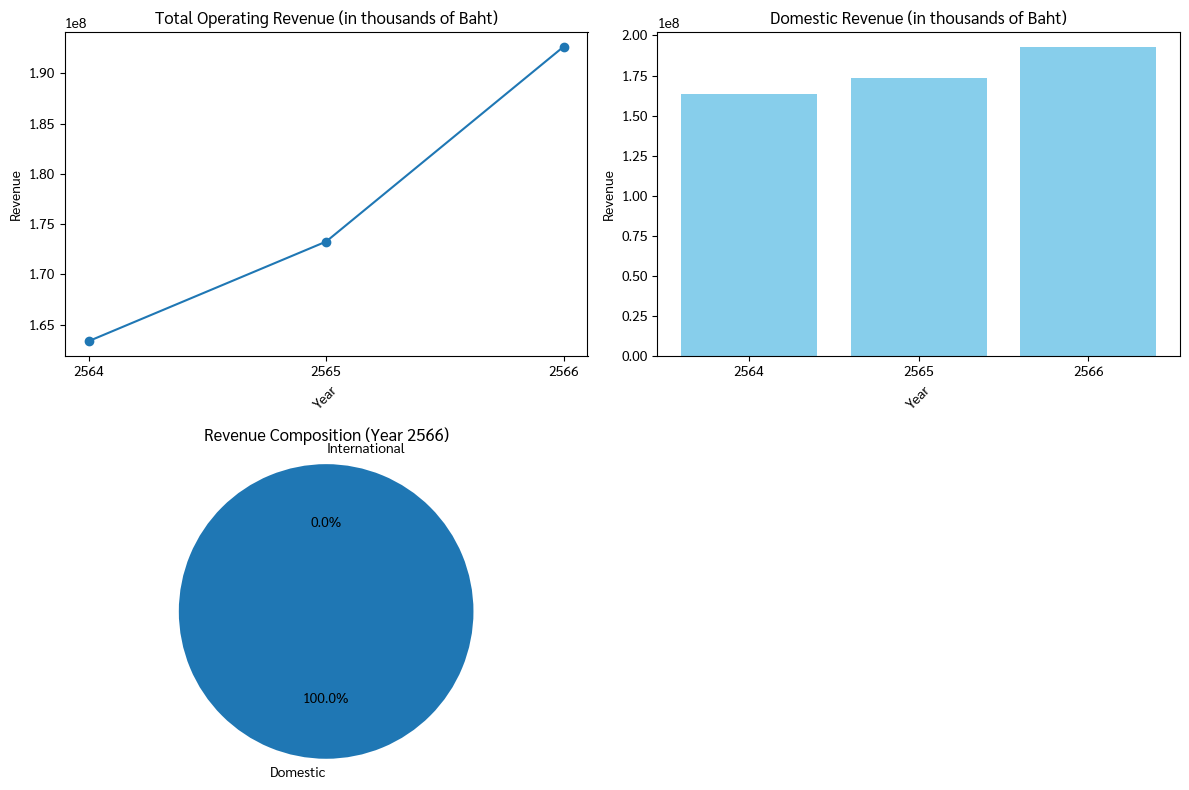

In [23]:
python_code = get_gemini_completion(prompt, stream=True)
exec(python_code.strip().strip("`").lstrip("python").strip())

In [19]:
prompt = """
The stock KBANK is a bussiness mentioned in Thai "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"


Balance sheet detail

| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากในประเทศ (พันบาท)       | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้จากต่างประเทศ (พันบาท)      | 0.00           | 0.00           | 0.00           |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้จากในประเทศ (%)           | 100.00         | 100.00         | 100.00         |
| รายได้จากต่างประเทศ (%)          | 0.00           | 0.00           | 0.00           |


Act as finanical analyst and analyse this data and write a Python code with the following sections:

1. Comment file header and show your thought how this data can support the investors
2. Use Matplotlib to create at least 3 visualisations to ease investors. You should use subplot for presentation and rotate X-axis label with 45 degree.
3. Use from IPython.display import HTML, display functions to conclude your data analytics

You must give only the answer do not add prologue, prefix and suffix.
"""

python_code = get_open_ai_completion(prompt, stream=True)
exec(python_code.strip().strip("`").lstrip("python").strip())

```python
# File Header: Financial Analysis of KBANK Stock
# This data provides valuable insights into the financial performance of KBANK, a leading Thai bank. 
# By analyzing the revenue trends, investors can make informed decisions about their investments.

import matplotlib.pyplot as plt
import pandas as pd

# Load data
data = {
    'Year': [2564, 2565, 2566],
    'Total Revenue (Billion THB)': [163.348945, 173.257605, 192.653621],
    'Domestic Revenue (Billion THB)': [163.348945, 173.257605, 192.653621],
    'International Revenue (Billion THB)': [0, 0, 0]
}
df = pd.DataFrame(data)

# Create visualizations
fig, axs = plt.subplots(3, figsize=(12, 15))

axs[0].bar(df['Year'], df['Total Revenue (Billion THB)'])
axs[0].set_title('Total Revenue')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Revenue (Billion THB)')
axs[0].tick_params(axis='x', labelrotation=45)

axs[1].bar(df['Year'], df['Domestic Revenue (Billion THB)'])
axs[1].set_title('Domestic Revenue')
axs[1].set_xlabel('Year')
ax

SyntaxError: unterminated string literal (detected at line 46) (<string>, line 46)

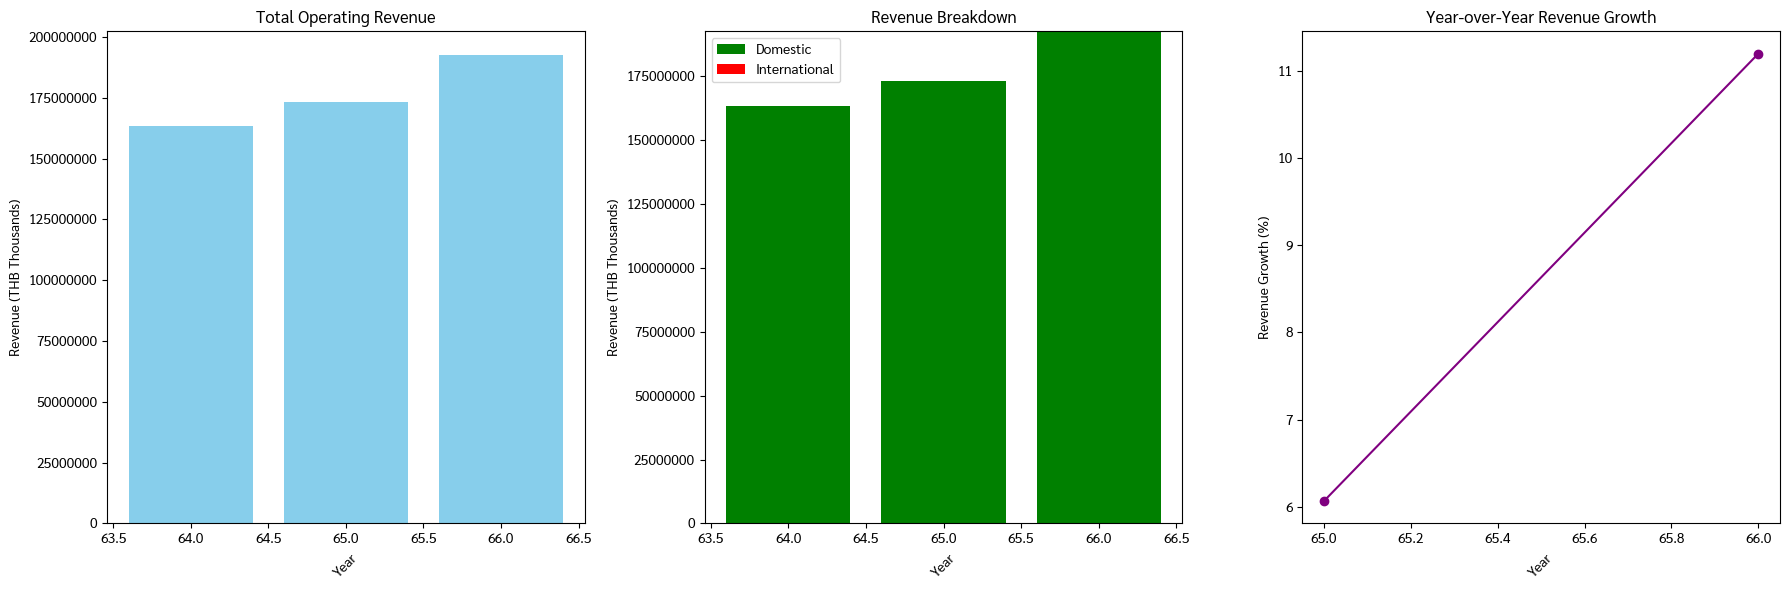

In [24]:
python_code = get_gemini_completion(prompt, stream=True)
exec(python_code.strip().strip("`").lstrip("python").strip())

In [ ]:
prompt = """
The stock KBANK is a bussiness mentioned in Thai "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"


Balance sheet detail:

โครงสร้างรายได้ของสายผลิตภัณฑ์หรือกลุ่มธุรกิจ:

| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้ดอกเบี้ยสุทธิ (%)             | 73.09          | 76.76          | 77.05          |
| รายได้ที่มิใช่ดอกเบี้ย (%)            | 26.91          | 23.24          | 22.95          |

โครงสร้างรายได้จากในประเทศและจากต่างประเทศ:

| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้ดอกเบี้ยสุทธิ (%)             | 73.09          | 76.76          | 77.05          |
| รายได้ที่มิใช่ดอกเบี้ย (%)            | 26.91          | 23.24          | 22.95          |

รายได้อื่น ตามที่ระบุในงบการเงิน:
| detail                                      | 2564   | 2565   | 2566   |
|:--------------------------------------------|:-------|:-------|:-------|
| รายได้อื่นรวม (พันบาท)                          | 0.00   | 0.00   | 0.00   |
| รายได้อื่นจากการดำเนินงาน (พันบาท)               | 0.00   | 0.00   | 0.00   |
| รายได้อื่นนอกเหนือจากการดำเนินงาน (พันบาท)        | 0.00   | 0.00   | 0.00   |
| ค่าใช้จ่ายการทำวิจัยและพัฒนา (R&D) ในระยะเวลา 3 ปี | N/A    | N/A    | N/A    |
| ที่ผ่านมา                                      |        |        |        |


Act as finanical analyst and analyse this data and write a Python code with the following sections:

1. Comment file header and show your thought how this data can support the investors
2. Use Matplotlib to create at least 3 visualisations to ease investors. You should use subplot for presentation and rotate X-axis label with 45 degree.
3. Use from IPython.display import HTML, display functions to conclude your data analytics

You must give only the answer do not add prologue, prefix and suffix.
"""

python_code = get_open_ai_completion(prompt, stream=True)
exec(python_code.strip("`").lstrip("python").strip())

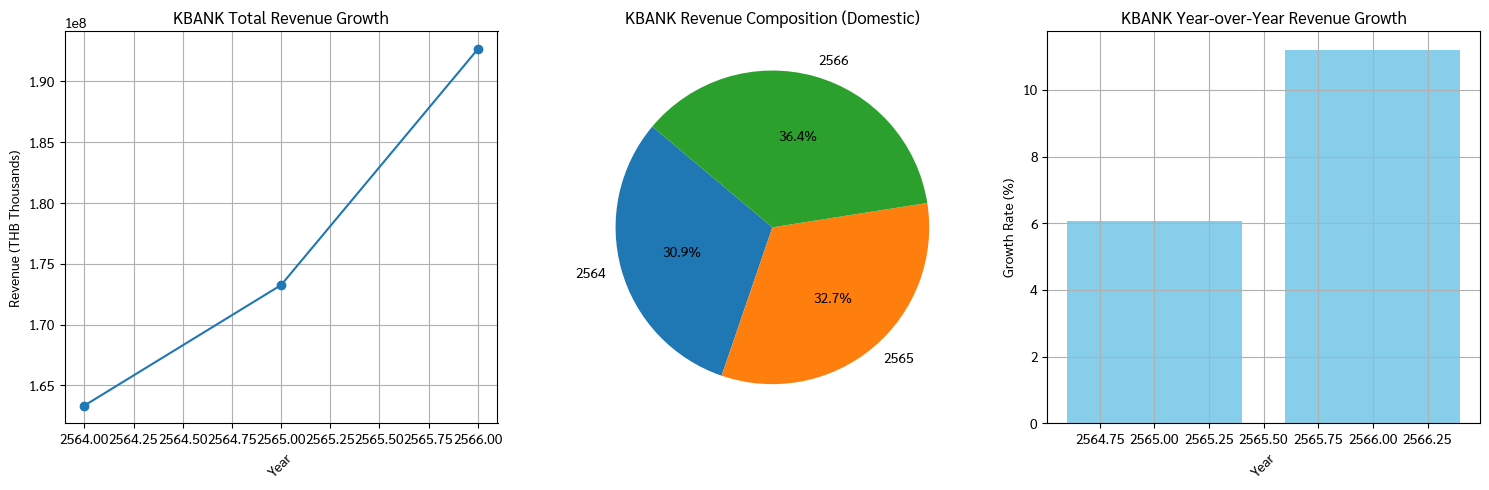

In [25]:
python_code = get_gemini_completion(prompt, stream=True)
exec(python_code.strip().strip("`").lstrip("python").strip())

In [ ]:
prompt = """
The stock KBANK is a bussiness mentioned in Thai "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"


Balance sheet detail:

โครงสร้างรายได้ของสายผลิตภัณฑ์หรือกลุ่มธุรกิจ:

| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้ดอกเบี้ยสุทธิ (%)             | 73.09          | 76.76          | 77.05          |
| รายได้ที่มิใช่ดอกเบี้ย (%)            | 26.91          | 23.24          | 22.95          |

โครงสร้างรายได้จากในประเทศและจากต่างประเทศ:

| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้ดอกเบี้ยสุทธิ (%)             | 73.09          | 76.76          | 77.05          |
| รายได้ที่มิใช่ดอกเบี้ย (%)            | 26.91          | 23.24          | 22.95          |

รายได้อื่น ตามที่ระบุในงบการเงิน:
| detail                                      | 2564   | 2565   | 2566   |
|:--------------------------------------------|:-------|:-------|:-------|
| รายได้อื่นรวม (พันบาท)                          | 0.00   | 0.00   | 0.00   |
| รายได้อื่นจากการดำเนินงาน (พันบาท)               | 0.00   | 0.00   | 0.00   |
| รายได้อื่นนอกเหนือจากการดำเนินงาน (พันบาท)        | 0.00   | 0.00   | 0.00   |
| ค่าใช้จ่ายการทำวิจัยและพัฒนา (R&D) ในระยะเวลา 3 ปี | N/A    | N/A    | N/A    |
| ที่ผ่านมา                                      |        |        |        |


What if Bank of Thailand reduce interate rate, how does it affect the company, answer in bullet points?
"""

answer = get_open_ai_completion(prompt, stream=True)
Markdown(answer)

In [ ]:
answer = get_gemini_completion(prompt, stream=True)
Markdown(answer)

In [ ]:
prompt = """
As as financial analyst, show me example of questions in bullet points to evaluate the balance sheet the company:

let's see the available data is limited and you can only:
- โครงสร้างรายได้ของสายผลิตภัณฑ์หรือกลุ่มธุรกิจ:
- โครงสร้างรายได้จากในประเทศและจากต่างประเทศ:
- รายได้อื่น ตามที่ระบุในงบการเงิน:


KBANK: "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"
"""
question = get_gemini_completion(prompt, stream=True)
Markdown(question)

In [ ]:
prompt = f"""
The stock KBANK is a bussiness mentioned in Thai "ธนาคารกสิกรไทย จํากัด (มหาชน) ประกอบกิจการธนาคารพาณิชย์ ธุรกิจ หลักทรัพย์และธุรกิจท่ีเก่ียวเนื่องตามที่ได้รับอนุญาตไว้ในพระราชบัญญัติธุรกิจ สถาบันการเงินฯ และพระราชบัญญัติหลักทรัพย์และตลาดหลักทรัพย์ฯ และ ประกาศที่เกี่ยวข้อง โดย ณ วันที่ 31 ธันวาคม 2566 ธนาคารมีเครือข่ายสาขา จํานวน 809 สาขา และเครื่องอิเล็กทรอนิกส์สําหรับทําธุรกรรมด้วยตนเอง 10,903 เครื่อง ครอบคลุมทุกพื้นท่ีและเพียงพอต่อความต้องการของลูกค้า นอกจากน้ี ธนาคารมีเครือข่ายการให้บริการในต่างประเทศรวม 16 แห่ง ใน 8 ประเทศ มีศูนย์กลางการดําเนินงานและให้บริการท่ีสํานักงานใหญ่"


Balance sheet detail:

โครงสร้างรายได้ของสายผลิตภัณฑ์หรือกลุ่มธุรกิจ:

| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้ดอกเบี้ยสุทธิ (%)             | 73.09          | 76.76          | 77.05          |
| รายได้ที่มิใช่ดอกเบี้ย (%)            | 26.91          | 23.24          | 22.95          |

โครงสร้างรายได้จากในประเทศและจากต่างประเทศ:

| detail                         | 2564           | 2565           | 2566           |
|:-------------------------------|:---------------|:---------------|:---------------|
| รายได้จากการดำเนินงานรวม (พันบาท) | 163,348,945.00 | 173,257,605.00 | 192,653,621.00 |
| รายได้ดอกเบี้ยสุทธิ (พันบาท)         | 119,390,486.00 | 132,998,355.00 | 148,443,946.00 |
| รายได้ที่มิใช่ดอกเบี้ย (พันบาท)        | 43,958,459.00  | 40,259,250.00  | 44,209,675.00  |
| รายได้จากการดำเนินงานรวม (%)     | 100.00         | 100.00         | 100.00         |
| รายได้ดอกเบี้ยสุทธิ (%)             | 73.09          | 76.76          | 77.05          |
| รายได้ที่มิใช่ดอกเบี้ย (%)            | 26.91          | 23.24          | 22.95          |

รายได้อื่น ตามที่ระบุในงบการเงิน:
| detail                                      | 2564   | 2565   | 2566   |
|:--------------------------------------------|:-------|:-------|:-------|
| รายได้อื่นรวม (พันบาท)                          | 0.00   | 0.00   | 0.00   |
| รายได้อื่นจากการดำเนินงาน (พันบาท)               | 0.00   | 0.00   | 0.00   |
| รายได้อื่นนอกเหนือจากการดำเนินงาน (พันบาท)        | 0.00   | 0.00   | 0.00   |
| ค่าใช้จ่ายการทำวิจัยและพัฒนา (R&D) ในระยะเวลา 3 ปี | N/A    | N/A    | N/A    |
| ที่ผ่านมา                                      |        |        |        |


Act as the best financial analyst and try your best answer the following question for the information and you are allowed to infer the answer from your experiece
{question}
"""

answer = get_open_ai_completion(prompt, stream=True)
Markdown(answer)